## Importing packages and listing versions

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
import os
import warnings
warnings.filterwarnings('ignore')

In [2]:
version = {'pandas':pd.__version__,
 'numpy':np.__version__,
 'seaborn':sns.__version__,
 'sklearn':sklearn.__version__,
}
version

{'pandas': '0.23.4',
 'numpy': '1.17.2',
 'seaborn': '0.9.0',
 'sklearn': '0.20.1'}

### Changing working directory to current directory

In [3]:
os.chdir(os.getcwd())

In [4]:
df = pd.read_excel('Trips_data.xlsx')

### Lets look at the shape and top few rows of the trips data

In [5]:
df.head()

,trip_id,customer_id,timestamp,pick_lat,pick_lng,drop_lat,drop_lng,travel_distance,travel_time,trip_fare
0,ID001,CUST_001,1546709270211,17.442705,78.387878,17.457829,78.399056,2.806,12.609667,37
1,ID002,CUST_002,1546709309524,17.490189,78.415512,17.450548,78.367294,11.991,24.075200,119
2,ID003,CUST_003,1546709331857,17.370108,78.515045,17.377041,78.517921,1.322,8.708300,27
3,ID004,CUST_004,1546709358403,17.439314,78.443001,17.397131,78.516586,11.822,24.037550,121
4,ID005,CUST_005,1546709386884,17.432325,78.381966,17.401625,78.400032,6.978,16.120867,58


In [6]:
df.shape

(44587, 10)

In [7]:
df.isna().sum()

trip_id            0
customer_id        0
timestamp          0
pick_lat           0
pick_lng           0
drop_lat           0
drop_lng           0
travel_distance    0
travel_time        0
trip_fare          0
dtype: int64

### We have 44587 unique trips contained in the dataset, with features such as pick up, drop location, distance, time, travel time and fare. Datset does not contain null values

## <font color='green'> Lets perform Exporatory analysis on the trips data </font>

In [8]:
df_continuous = df.ix[:,['travel_distance','travel_time','trip_fare']]

### Lets perform some outlier analysis and try to find relationship between distance, time and fare

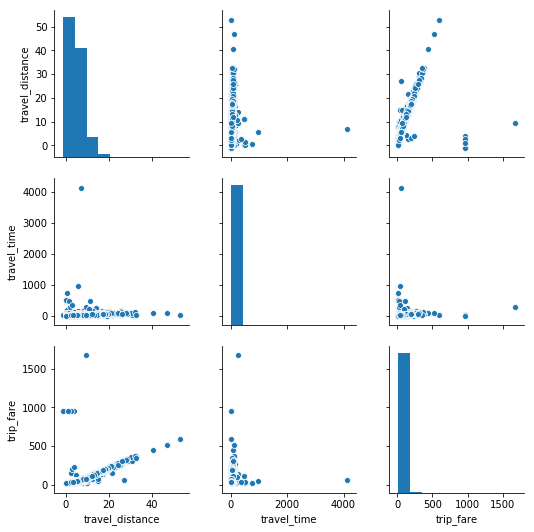

In [9]:
sns.pairplot(df_continuous)

### There are some extreme values as seen from the scatterplot, such as a fare of more than 1500 for a distance of  around 10 kms, a travel time of 4000 minutes for a fare of around 10-50. Lets take a look at these outliers

### Also, we see the distance and time to be clustered around 0 each, meaning 0 distance for a time of 0, lets look at these cases as well

### Lets look at the trips which exceeds the 99.98 percentile threshold value for fare and time, and the trips whos e distance is negative

In [10]:
df[(df.trip_fare>=np.percentile(df.trip_fare,99.98))|(df.travel_time>=np.percentile(df.travel_time,99.98))|(df.travel_distance<0)]

,trip_id,customer_id,timestamp,pick_lat,pick_lng,drop_lat,drop_lng,travel_distance,travel_time,trip_fare
145,ID146,CUST_142,1546712267334,17.396492,78.479980,17.368525,78.533218,-1.000,19.247367,959
669,ID670,CUST_636,1546537665127,17.465956,78.376404,17.439905,78.376053,11.330,467.443383,113
7165,ID7166,CUST_1006,1546790025616,17.443495,78.390411,17.444721,78.386597,52.801,14.164500,593
10316,ID10317,CUST_7419,1546583372751,17.370081,78.479561,17.393438,78.492004,6.889,4134.388700,60
12636,ID12637,CUST_4924,1546602838986,17.440790,78.377480,17.447018,78.363709,-1.000,11.838667,959
13680,ID13681,CUST_9235,1546608434613,17.400074,78.448494,17.393158,78.441002,5.697,962.766250,49
15078,ID15079,CUST_9834,1546372237662,17.431397,78.438911,17.434099,78.404922,0.000,473.183900,20
17206,ID17207,CUST_7151,1546407689604,17.433880,78.384483,17.441532,78.362556,-1.000,11.014850,959
18259,ID18260,CUST_11167,1546416515636,17.392820,78.459129,17.405748,78.443039,46.747,98.218850,521
18501,ID18502,CUST_11267,1546418515366,17.393658,78.495644,17.404640,78.496559,0.002,504.808017,20


### Clearly, these are some errors in the data collection. We conclude this as we observe such as the travel time of more than 4000 minutes for a distance of 6 kms or a fare of 60 and other similar observations which are not feasible.

### All except trip ID 18259 are discrepencies in data collection, hence we will remove these cases going forward

### Lets also look at the trips where the distance recorded is 0

In [11]:
df[df.travel_distance==0].head(10)

,trip_id,customer_id,timestamp,pick_lat,pick_lng,drop_lat,drop_lng,travel_distance,travel_time,trip_fare
55,ID056,CUST_056,1546710133113,17.409777,78.462952,17.409777,78.462952,0.0,0.052050,20
152,ID153,CUST_149,1546712538963,17.385977,78.431549,17.385977,78.431549,0.0,0.242750,20
155,ID156,CUST_152,1546712580519,17.426565,78.452843,17.426565,78.452843,0.0,0.261333,20
249,ID250,CUST_243,1546532267170,17.438530,78.394989,17.468258,78.360641,0.0,0.101450,20
587,ID588,CUST_561,1546536445984,17.406101,78.409821,17.433184,78.418320,0.0,0.050750,20
760,ID761,CUST_712,1546539788399,17.436394,78.444367,17.402624,78.544907,0.0,0.115400,20
932,ID933,CUST_861,1546447221840,17.404141,78.495010,17.438583,78.481247,0.0,7.439900,20
1182,ID1183,CUST_1048,1546451333621,17.447901,78.374298,17.468740,78.369087,0.0,0.056567,20
1263,ID1264,CUST_1062,1546453214187,17.402567,78.544945,17.399383,78.505020,0.0,0.450583,20
1270,ID1271,CUST_1125,1546453437683,17.438766,78.380875,17.463976,78.367027,0.0,0.064933,20


In [12]:
df[df.travel_distance==0].shape

(231, 10)

### The time for almost all of these trips is less a minute and fare is 20. looks like these are cancelled trips where a user is charged 20 as cancellation fee. We remove these from analysis as we also wish to know the relationship between distance and fare and this will lead to skewness in the data towards one particular value (0 for distance, 20 for fare, less than 1 minute for time)

### We get rid of data collection discrepencies to perform an unbiased analysis of the trips

In [13]:
df_processed = df[((df.trip_fare<np.percentile(df.trip_fare,99.98))&(df.travel_time<np.percentile(df.travel_time,99.98))&(df.travel_distance>0))|(df.trip_id==18259)]

In [14]:
df_processed.shape

(44339, 10)

### Lets look at the relationship between time, distance and fare now

In [15]:
df_processed_continuous = df_processed.iloc[:,7:10]

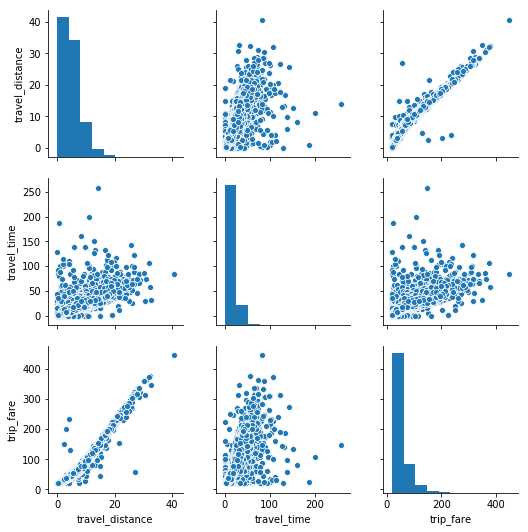

In [16]:
sns.pairplot(df_processed_continuous)

### We see a positive linear relationship between distance and fare now after removing discrepencies. However, we still do not see any evident relationship between time and fare and between time and distance

### Also, we do not see any significant outliers now

### Lets look at the top customers based on distance travelled and fare paid

### Customers who have travelled most

In [17]:
df_processed.groupby('customer_id')['travel_distance'].sum().round().sort_values(ascending = False).nlargest(n=5).reset_index()

,customer_id,travel_distance
0,CUST_345,225.0
1,CUST_4119,224.0
2,CUST_004,174.0
3,CUST_2367,141.0
4,CUST_3288,140.0


### Customers who have paid most

In [18]:
df_processed.groupby('customer_id')['trip_fare'].sum().round().sort_values(ascending = False).nlargest(n=5).reset_index()

,customer_id,trip_fare
0,CUST_345,2399
1,CUST_4119,2203
2,CUST_004,1841
3,CUST_279,1811
4,CUST_2367,1361


### Customers who have spent the most time in travelling 

In [19]:
df_processed.groupby('customer_id')['travel_time'].sum().round().sort_values(ascending = False).nlargest(n=5).reset_index()

,customer_id,travel_time
0,CUST_4119,725.0
1,CUST_345,601.0
2,CUST_004,488.0
3,CUST_1777,485.0
4,CUST_2367,435.0


### Customers who travel most frequently

In [20]:
df_processed.groupby('customer_id')['trip_id'].count().round().sort_values(ascending = False).nlargest(n=5).reset_index().rename(columns = {'trip_id':'num_trips'})

,customer_id,num_trips
0,CUST_279,53
1,CUST_4119,25
2,CUST_3100,25
3,CUST_1120,21
4,CUST_232,21


### Lets look at frequent pickup locations using a heatmap

In [21]:
import folium

In [40]:
def generateBaseMap(default_location=[17, 78], default_zoom_start=8):
    base_map = folium.Map(location=default_location, control_scale=True, zoom_start=default_zoom_start)
    return base_map

In [41]:
from folium.plugins import HeatMap
base_map = generateBaseMap()
HeatMap(data=df_processed[['pick_lat', 'pick_lng']].groupby(['pick_lat', 'pick_lng']).sum().reset_index().values.tolist(), radius=8, max_zoom=13).add_to(base_map)
base_map

In [42]:
pickup_coordinates = []
for i in range(20):
    pickup_coordinates.append((df_processed.pick_lat[i],df_processed.pick_lng[i]))
    i+= 1
dropoff_coordinates = []
for i in range(20):
    dropoff_coordinates.append((df_processed.drop_lat[i],df_processed.drop_lng[i]))
    i+= 1

In [43]:
all_coordinates = list(zip(pickup_coordinates,dropoff_coordinates))

In [62]:
def plot_trip(coordinates):
    for coordinate in coordinates:
        p1 = [coordinate[0][0],coordinate[0][1]]
        p2 = [coordinate[1][0],coordinate[1][1]]
        folium.PolyLine(locations=[p1,p2],smooth_factor=0.1).add_to(map_)

### Lets analyze only few trips at once than analyzing all at once since analyzing all trips at once is not feasible

In [77]:
map_ = folium.Map(location=[17, 79], max_zoom=9)
plot_trip(all_coordinates)
map_

## <font color = 'green'> Metric calculation </font>

### Lets remove the customers who have travelled only once from the analysis

In [78]:
df_freq_cust = pd.DataFrame(df_processed.groupby('customer_id')['trip_id'].count().round()).rename(columns={'trip_id':'num_trips'})

In [79]:
df_freq_cust = df_freq_cust[df_freq_cust.num_trips>=2]

### Lets merge with original dataset to calculate time between first and second trips

In [80]:
df_freq_cust = pd.merge(df_processed.loc[:,['customer_id','timestamp']],df_freq_cust,on='customer_id')

In [81]:
df_freq_cust['next_trip'] = (df_freq_cust.sort_values(by=['timestamp'], ascending=True)
                       .groupby(['customer_id'])['timestamp'].shift(-1))

df_freq_cust['rank_by_timestamp'] = df_freq_cust.groupby('customer_id')['timestamp'].rank(method='first')

In [82]:
df_freq_cust = df_freq_cust[df_freq_cust.rank_by_timestamp==1.0]

### Lets create the metric as a column in the dataset. lets calculate the difference between trips in hours

In [83]:
df_freq_cust['diff_bw_1&2'] = round((df_freq_cust['next_trip'] - df_freq_cust['timestamp']) / (60*60*1000),1)

df_freq_cust = df_freq_cust.drop(['timestamp','next_trip','rank_by_timestamp','num_trips'],axis=1)

In [84]:
df_freq_cust.head()

,customer_id,diff_bw_1&2
6,CUST_001,7.3
13,CUST_003,25.9
22,CUST_004,10.3
29,CUST_005,14.3
36,CUST_006,8.2


#### P.S - the difference is calculated in hours

### Lets prepare the dataset to fit in the model

In [85]:
from sklearn.model_selection import train_test_split

In [86]:
df_processed_continuous_train, df_processed_continuous_test = train_test_split(df_processed_continuous,random_state=1234)

In [87]:
response = df_processed_continuous.columns[-1]
predictors = df_processed_continuous.columns[:-1]

In [88]:
df_processed_continuous_train_input = df_processed_continuous_train.ix[:,predictors]
df_processed_continuous_test_input  = df_processed_continuous_test.ix[:,predictors]
df_processed_continuous_train_label = df_processed_continuous_train.ix[:,response]
df_processed_continuous_test_label  = df_processed_continuous_test.ix[:,response]

In [89]:
df_processed_continuous_train_input.shape,df_processed_continuous_test_input.shape,df_processed_continuous_train_label.shape,df_processed_continuous_test_label.shape

((33254, 2), (11085, 2), (33254,), (11085,))

### Since, we saw a linear relationship between distance and fare, we first go with linear model

In [90]:
from sklearn.metrics import mean_absolute_error

In [91]:
from sklearn.linear_model import LinearRegression
lin_model = LinearRegression()
lin_model.fit(df_processed_continuous_train_input,df_processed_continuous_train_label)
lin_pred = lin_model.predict(df_processed_continuous_test_input)
lin_mae_test  = mean_absolute_error(lin_pred,df_processed_continuous_test_label)
print('Mean absolute error for predictions on unseen data is: ',lin_mae_test)

Mean absolute error for predictions on unseen data is:  5.262018270070821


### The test error is low which means our model is both fitting well to the data as well as predicting unseen data well

### Lets do some model diagnostics to validate our assumptions of the linear regression model

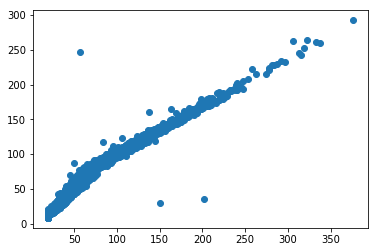

In [92]:
plt.scatter(df_processed_continuous_test_label,lin_pred)

### Model predicts the unseen data really well with only slight errors

(array([1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 4.360e+02, 1.051e+04,
        1.280e+02, 8.000e+00, 1.000e+00, 1.000e+00]),
 array([-190.57397998, -154.82524375, -119.07650752,  -83.32777129,
         -47.57903506,  -11.83029883,   23.9184374 ,   59.66717363,
          95.41590986,  131.16464609,  166.91338232]),
 <a list of 10 Patch objects>)

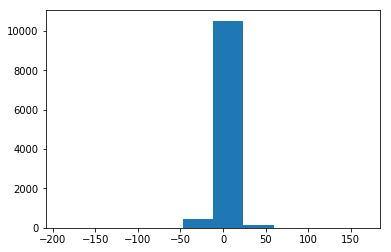

In [93]:
residuals = df_processed_continuous_test_label-lin_pred
plt.hist(residuals)

### Residuals are clustered around 0, which means the normality of residuals assumption is validated

### Also we saw earlier there is no or very slight correlation between distance and time, hence collinearirty assumption is validated as well

### We could have applied regularization techniques such as fitting lasso, ridge regression, early stopping if we had faced the issue of overfitting (model does not generalizes well to test data but fits training data well)

### We could also have fitted non linear models to the data had we seen non linearity between the response and predictors, we could have gone for decision tree regressor or even ensemble techniques such as random forest regressors.

### Last but not the least, tuning the hyperparameters of more complex models such as random forest or boosted trees helps generalizing the model well to the unseen data

### Lets try ensembling and see if it reduce the Mean absolute error

In [94]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(df_processed_continuous_train_input,df_processed_continuous_train_label)
lin_pred = rf.predict(df_processed_continuous_test_input)
rf_mae_test  = mean_absolute_error(lin_pred,df_processed_continuous_test_label)
print('Mean absolute error for predictions on unseen data is: ',rf_mae_test)

Mean absolute error for predictions on unseen data is:  2.4811186287776277


### Ensembling reduces error significantly

### Lets save the model as pickle string so that later we can load and predict without having to train the model again

In [95]:
import pickle 
  
# Save the trained model as a pickle string. 
saved_model = pickle.dumps(rf)

In [96]:
rf.predict([[3.5,15]])

array([41.2])

### Model predicts a fare of 41.2 for a distance of 3.5 kms and travel time of 15 minutes

## <font color = 'green'> Top hex clusters </font>

In [97]:
from h3 import h3

In [98]:
hexids_pickup = []
hexids_dropoff = []
for i in df_processed.index:
    hexids_pickup.append(h3.geo_to_h3(df_processed.pick_lat[i],df_processed.pick_lng[i],res=8))
    hexids_dropoff.append(h3.geo_to_h3(df_processed.drop_lat[i],df_processed.drop_lng[i],res=8))
    i+= 1
df_processed['hexid_pickup'] = hexids_pickup
df_processed['hexid_dropoff'] = hexids_dropoff
df_processed['hexid'] = df_processed['hexid_pickup'] + ' to ' + df_processed['hexid_dropoff']
df_processed.head()

,trip_id,customer_id,timestamp,pick_lat,pick_lng,drop_lat,drop_lng,travel_distance,travel_time,trip_fare,hexid_pickup,hexid_dropoff,hexid
0,ID001,CUST_001,1546709270211,17.442705,78.387878,17.457829,78.399056,2.806,12.609667,37,8860a259b9fffff,8860a259a3fffff,8860a259b9fffff to 8860a259a3fffff
1,ID002,CUST_002,1546709309524,17.490189,78.415512,17.450548,78.367294,11.991,24.075200,119,8860b19695fffff,8860a24a65fffff,8860b19695fffff to 8860a24a65fffff
2,ID003,CUST_003,1546709331857,17.370108,78.515045,17.377041,78.517921,1.322,8.708300,27,8860a25b4dfffff,8860b52e93fffff,8860a25b4dfffff to 8860b52e93fffff
3,ID004,CUST_004,1546709358403,17.439314,78.443001,17.397131,78.516586,11.822,24.037550,121,8860a25915fffff,8860a25b65fffff,8860a25915fffff to 8860a25b65fffff
4,ID005,CUST_005,1546709386884,17.432325,78.381966,17.401625,78.400032,6.978,16.120867,58,8860a25995fffff,8860a258e5fffff,8860a25995fffff to 8860a258e5fffff


In [99]:
df_processed.groupby('hexid')['trip_id'].count().sort_values(ascending = False).nlargest(n=5).reset_index().rename(columns = {'trip_id':'num_trips'})

,hexid,num_trips
0,8860a259b9fffff to 8860a25995fffff,194
1,8860a25995fffff to 8860a259b9fffff,90
2,8860a259b9fffff to 8860a259bbfffff,82
3,8860a259b9fffff to 8860a24a6dfffff,80
4,8860a24a6dfffff to 8860a24b51fffff,79
